In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('loan_data_set.csv')

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.fillna(method = 'bfill',inplace= True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_17152\784014395.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'bfill',inplace= True)


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
column = df.select_dtypes(include=[int,float]).columns

In [44]:
Q1 = df[column].quantile(0.25)
Q2 = df[column].quantile(0.75)

In [45]:
IQR = Q2 - Q1

In [46]:
max_range = Q2 + (1.5 * IQR)

In [75]:
newdf = pd.DataFrame(df.select_dtypes(include=[int,float]))

In [76]:
newdf = newdf[newdf[column] <= max_range]

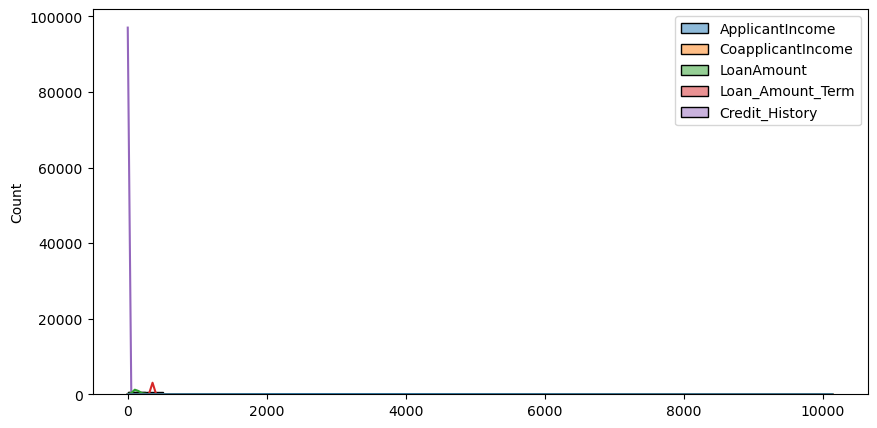

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(newdf,kde = True)
plt.show()

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
obj = MinMaxScaler()
obj.fit(newdf)

MinMaxScaler()

In [80]:
arr = obj.transform(newdf)

In [81]:
newdf = pd.DataFrame(arr,columns = column)

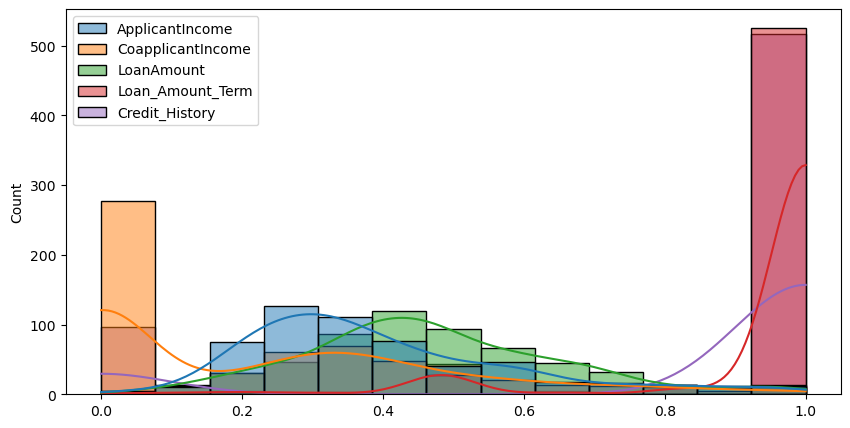

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(newdf,kde = True)
plt.show()

In [84]:
newdf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,596.000000,573.000000,599.000000,614.00000
mean,0.397910,0.226123,0.468593,0.939554,0.84202
std,0.192911,0.256398,0.184307,0.176401,0.36502
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.259686,0.000000,0.355469,1.000000,1.00000
50%,0.349234,0.180845,0.449219,1.000000,1.00000
75%,0.486585,0.381161,0.582031,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [88]:
newdf.duplicated().sum()

14

In [89]:
newdf.drop_duplicates(inplace = True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [108]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [104]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [111]:
df['Dependents'].replace('3+', 3.5,inplace = True)

In [113]:
df['Dependents'] = df['Dependents'].astype('int64')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [119]:
df[column] = newdf

In [162]:
newColumns =['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']

In [163]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [164]:
from sklearn.preprocessing import LabelEncoder

In [171]:
label_encoders = {}

In [172]:
for col in newColumns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df)
plt.show()

C:\Users\siddh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
